In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import sklearn.neighbors
import matplotlib.pyplot as plt
%matplotlib inline

import Levenshtein

import sys
sys.path.append('..')

from lib import *

In [2]:
df_t = load_iedb_tcellepitopes(human_only=True, positive_only=True)

In [3]:
k = 9
counter9 = count_kmers_proteome(human, k, clean=True)

In [4]:
human9 = set(counter9)

In [5]:
# no human epitopes
mask = ~df_t['Epitope', 'Parent Species'].str.contains('Homo sapiens', na=False)
# no epitopes of unknown provenance
mask &= ~df_t['Epitope', 'Parent Species'].isna()
# only epitopes of length 9
mask &= df_t['Epitope', 'Description'].apply(len)==9
# only infectious disease epitopes
#mask &= df_t['1st in vivo Process', 'Process Type'] == 'Occurrence of infectious disease'
d = df_t[mask]

In [6]:
d['1st in vivo Process', 'Process Type'].value_counts()

Occurrence of infectious disease                                                   4106
Exposure with existing immune reactivity without evidence for disease              2621
Environmental exposure to endemic/ubiquitous agent without evidence for disease    2327
Administration in vivo                                                              982
No immunization                                                                     693
Documented exposure without evidence for disease                                    207
Exposure without evidence for disease                                               137
Occurrence of autoimmune disease                                                     64
Occurrence of cancer                                                                 58
Occurrence of allergy                                                                45
Occurrence of disease                                                                21
Unknown                         

In [7]:
d0 = d[d['Epitope', 'Description'].apply(lambda x: x in human9)]
d0

Reference  \
                                Assay IRI   
71222   http://www.iedb.org/assay/1420885   
71224   http://www.iedb.org/assay/1420887   
71261   http://www.iedb.org/assay/1420962   
79301   http://www.iedb.org/assay/1472651   
108738  http://www.iedb.org/assay/1645537   
116420  http://www.iedb.org/assay/1664514   
199545  http://www.iedb.org/assay/1962919   
199546  http://www.iedb.org/assay/1962920   
199547  http://www.iedb.org/assay/1962921   
199549  http://www.iedb.org/assay/1962923   
199551  http://www.iedb.org/assay/1962925   
199552  http://www.iedb.org/assay/1962926   
199554  http://www.iedb.org/assay/1962928   
199555  http://www.iedb.org/assay/1962929   
199556  http://www.iedb.org/assay/1962930   
249449  http://www.iedb.org/assay/2104092   
279349  http://www.iedb.org/assay/2642070   
279351  http://www.iedb.org/assay/2642072   
322579  http://www.iedb.org/assay/3193385   
338722  http://www.iedb.org/assay/3925457   
338723  http://www.iedb.org/assay/3925458   
338724  http://www.iedb.org/assay/3925459   
338726  http://www.iedb.org/assay/3925463   
338727  http://www.iedb.org/assay/3925464   
338728  http://www.iedb.org/assay/3925465   

                                                                       \
                                Reference IRI        Type   PubMed ID   
71222   http://www.iedb.org/reference/1004613  Literature  12960383.0   
71224   http://www.iedb.org/reference/1004613  Literature  12960383.0   
71261   http://www.iedb.org/reference/1004613  Literature  12960383.0   
79301   http://www.iedb.org/reference/1006541  Literature   7520213.0   
108738  http://www.iedb.org/reference/1014513  Literature  18198358.0   
116420  http://www.iedb.org/reference/1007092  Literature   1281825.0   
199545  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199546  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199547  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199549  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199551  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199552  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199554  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199555  http://www.iedb.org/reference/1025272  Literature  23155466.0   
199556  http://www.iedb.org/reference/1025272  Literature  23155466.0   
249449  http://www.iedb.org/reference/1027586  Literature  24755960.0   
279349  http://www.iedb.org/reference/1029824  Literature  26771180.0   
279351  http://www.iedb.org/reference/1029824  Literature  26771180.0   
322579  http://www.iedb.org/reference/1031485  Literature  28148797.0   
338722  http://www.iedb.org/reference/1033211  Literature  29709038.0   
338723  http://www.iedb.org/reference/1033211  Literature  29709038.0   
338724  http://www.iedb.org/reference/1033211  Literature  29709038.0   
338726  http://www.iedb.org/reference/1033211  Literature  29709038.0   
338727  http://www.iedb.org/reference/1033211  Literature  29709038.0   
338728  http://www.iedb.org/reference/1033211  Literature  29709038.0   

                                                           \
                                                  Authors   
71222   Gabriella Pietra; Chiara Romagnani; Paola Mazz...   
71224   Gabriella Pietra; Chiara Romagnani; Paola Mazz...   
71261   Gabriella Pietra; Chiara Romagnani; Paola Mazz...   
79301          S S Witkin; J Jeremias; M Toth; W J Ledger   
108738  Hubert Tsui; Yin Chan; Lan Tang; Shawn Winer; ...   
116420  J M Davies; S Sonoda; S Yashiki; M Osame; P R ...   
199545  Wendy W J Unger; Todd Pearson; Joana R F Abreu...   
199546  Wendy W J Unger; Todd Pearson; Joana R F Abreu...   
199547  Wendy W J Unger; Todd Pearson; Joana R F Abreu...   
199549  Wendy W J Unger; Todd Pearson; Joana R F Abreu...   
199551  Wendy W J Unger; Todd Pearson; Joana R F Abreu...   
199552  Wendy W J Unger; Todd Pearson; Joana R F Ab

In [8]:
d0['Epitope', 'Parent Species'].unique()

array(['Human betaherpesvirus 5', 'Chlamydia trachomatis', 'Mus musculus',
       'Cavia porcellus', 'Mycobacterium tuberculosis',
       'Leishmania major', 'Dengue virus'], dtype=object)

In [9]:
counter_to_df(counter9)

,seq,freq
0,MGAPLLSPG,1.762206e-07
1,GAPLLSPGW,1.762206e-07
2,APLLSPGWG,1.762206e-07
3,PLLSPGWGA,1.762206e-07
4,LLSPGWGAG,1.762206e-07
5,LSPGWGAGA,1.762206e-07
6,SPGWGAGAA,1.762206e-07
7,PGWGAGAAG,1.762206e-07
8,GWGAGAAGR,1.762206e-07
9,WGAGAAGRR,1.762206e-07


In [10]:
p = len(human9)/20**9
d0.shape[0], p*d.shape[0]

(25, 0.2294887638125)

In [11]:
def dist1(x):
    for i in range(len(x)):
        for aa in aminoacids:
            if aa == x[i]:
                continue
            if x[:i]+aa+x[i+1:] in human9:
                return True
    return False
d1 = d[d['Epitope', 'Description'].apply(dist1)]

In [12]:
d1.shape[0], p*d.shape[0]*19*9

(269, 39.242578611937496)

In [13]:
d1['Epitope', 'Parent Species'].unique()

array(['Hepatitis B virus', 'Mycobacterium tuberculosis',
       'Influenza A virus', 'Dengue virus', 'Borreliella burgdorferi',
       'Hepacivirus C', 'Streptococcus pyogenes', 'Plasmodium falciparum',
       'Plasmodium vivax', 'Leishmania donovani', 'Trypanosoma cruzi',
       'Human gammaherpesvirus 4', 'Chlamydia trachomatis',
       'Human betaherpesvirus 5', 'Measles morbillivirus',
       'Severe acute respiratory syndrome-related coronavirus',
       'Vaccinia virus', 'Triticum aestivum', 'Human metapneumovirus',
       'Primate T-lymphotropic virus 1', 'Mus musculus',
       'Mycobacterium kansasii', 'Toxoplasma gondii',
       'Human alphaherpesvirus 1', 'Alphapapillomavirus 9',
       'Mycobacterium leprae', 'Leishmania major',
       'Human mastadenovirus C', 'Bacteroides stercoris'], dtype=object)

# Hamming distance calculation

In [14]:
humansample = random.sample(human9, 100000)
points = np.asarray([map_aatonumber(h) for h in humansample])


In [15]:
#def hamming(s1, s2):
#    return sum(c1==c2 for c1, c2 in zip(s1, s2))
def mindist(x, sample):
    return min(Levenshtein.hamming(s, x) for s in sample)

In [16]:
mindist('AAACCCAAA', humansample)

3

In [17]:
%timeit -t mindist('AAACCCAAA', humansample)

38.8 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
bt = sklearn.neighbors.BallTree(points, metric='hamming')

In [19]:
def mindist_sklearn(x, tree):
    d, i = tree.query(map_aatonumber(x).reshape(1, -1))
    return int(d*len(x))

In [20]:
mindist_sklearn('AAACCCAAA', bt)

3

In [21]:
%timeit -t mindist_sklearn('AAACCCAAA', bt)

5.82 ms ± 643 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## on all 9mers

In [22]:
mindist('AAACCCAAA', human9)

2

In [23]:
%timeit -t mindist('AAACCCAAA', human9)

4.06 s ± 213 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
human9_number = np.asarray([map_aatonumber(h) for h in human9])

In [25]:
pointss = np.array_split(human9_number, 100)

In [26]:
bts = [sklearn.neighbors.BallTree(points, metric='hamming') for points in pointss]

In [27]:
def mindist_sklearn_chunked(x, trees):
    d = min(bt.query(map_aatonumber(x).reshape(1, -1))[0] for bt in trees)
    return int(d*len(x))

In [28]:
mindist_sklearn_chunked('AAACCCAAA', bts)

2

In [29]:
%timeit -t mindist_sklearn_chunked('AAACCCAAA', bts)

609 ms ± 9.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Analysis of flu epitopes

In [30]:
# no human epitopes
mask = ~df_t['Epitope', 'Parent Species'].str.contains('Homo sapiens', na=False)
# no epitopes of unknown provenance
mask &= ~df_t['Epitope', 'Parent Species'].isna()
# only epitopes of length 9
mask &= df_t['Epitope', 'Description'].apply(len)==9
d = df_t[mask]

In [31]:
d['Epitope', 'Parent Species'].value_counts()

Human gammaherpesvirus 4                                 1858
Human betaherpesvirus 5                                  1452
Hepacivirus C                                            1438
Influenza A virus                                         984
Mycobacterium tuberculosis                                725
Dengue virus                                              722
Primate T-lymphotropic virus 1                            482
Hepatitis B virus                                         364
Vaccinia virus                                            345
Human immunodeficiency virus 1                            336
Human alphaherpesvirus 1                                  243
Alphapapillomavirus 9                                     148
Plasmodium falciparum                                     140
Trypanosoma cruzi                                         140
Mycobacterium leprae                                      129
Yellow fever virus                                        119
Human ga

In [32]:
fluepis = d[d['Epitope', 'Parent Species'] == 'Influenza A virus']['Epitope', 'Description'].unique()
fluepis.shape

(114,)

(array([  0., 114.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <a list of 12 Patch objects>)

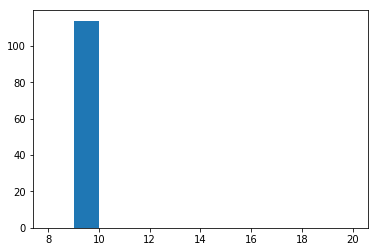

In [33]:
plt.hist([len(s) for s in fluepis], bins=np.arange(8, 21))

In [34]:
fludists = [mindist_sklearn_chunked(e, bts) for e in fluepis]

In [35]:
proteomes = load_proteomes()


In [36]:
df_flua = counter_to_df(count_kmers_proteome(datadir + proteomes.loc['InfluenzaA']['path'], 9), norm=True)
df_flua.head()

,seq,freq
0,MDSNTMSSF,0.000627
1,DSNTMSSFQ,0.000627
2,SNTMSSFQV,0.000313
3,NTMSSFQVD,0.000313
4,TMSSFQVDC,0.000313


In [37]:
distss = []
for i in range(3):
    peptides = np.random.choice(df_flua['seq'], size=len(fludists), replace=False, p=df_flua['freq'])
    dists = [mindist_sklearn_chunked(e, bts) for e in peptides]
    distss.append(dists)

[ 0  2 53 58  1]
[ 0  1 50 63]
[ 0  0 52 61  1]
[ 0  0 46 67  1]


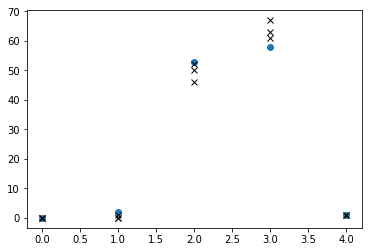

In [38]:
counts = np.bincount(fludists)
print(counts)
plt.plot(counts, 'o')
for d in [distss[0], distss[1], distss[2]]:
    counts = np.bincount(d)
    print(counts)
    plt.plot(counts, 'kx')

In [39]:
def dist2(x):
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for aai in aminoacids:
                si = x[:i]+aai+x[i+1:]
                for aaj in aminoacids:
                    if (aai == x[i]) and (aaj == x[j]):
                        continue
                    if si[:j]+aaj+si[j+1:] in human9:
                        return True
    return False

In [40]:
def dists_direct(df, ref):
    d0 = df[df['seq'].apply(lambda x: x in ref)].shape[0]/df['seq'].shape[0]
    d1 = df[df['seq'].apply(dist1)].shape[0]/df['seq'].shape[0]
    d2 = df[df['seq'].apply(dist2)].shape[0]/df['seq'].shape[0]
    return d0, d1, d2

In [41]:
distsallflu = dists_direct(df_flua, human9)

1.134941e+07


(0.0, 0.5901551987989777)

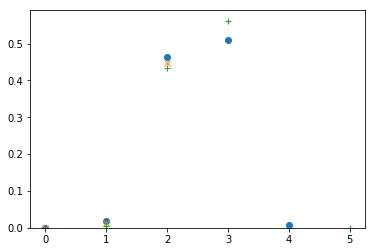

In [42]:
counts = np.bincount(fludists)
plt.plot(counts/np.sum(counts), 'o')
plt.plot(distsallflu, 'x')

N = sum(counter9.values())
print('%e'%N)
k = 9
K = 20**k

dists = np.arange(6)
Nc = lambda d: 19**dists * falling_factorial(k, dists+1)
cumulative = [0]
cumulative.extend(1-np.exp(-Nc(dists)*N/K))
plt.plot(dists, np.diff(cumulative), '+')
plt.ylim(0.0)

In [43]:
hivepis = d[d['Epitope', 'Parent Species'] == 'Human immunodeficiency virus 1']['Epitope', 'Description'].unique()
hivepis.shape

TypeError: list indices must be integers or slices, not tuple

In [ ]:
hivdists = [mindist_sklearn_chunked(e, bts) for e in hivepis]

In [ ]:
counts = np.bincount(hivdists)
print(counts)
plt.plot(counts, 'x')

In [ ]:
df_hiv1 = counter_to_df(count_kmers_proteome(datadir + proteomes.loc['HIV']['path'], 9), norm=True)
df_hiv1.head()

In [ ]:
distss_hiv = []
for i in range(3):
    peptides = np.random.choice(df_hiv1['seq'], size=len(hivdists), replace=False, p=df_hiv1['freq'])
    dists = [mindist_sklearn_chunked(e, bts) for e in peptides]
    distss_hiv.append(dists)

In [ ]:
counts = np.bincount(hivdists)
print(counts)
plt.plot(counts, 'o')
for d in distss_hiv:
    counts = np.bincount(d)
    print(counts)
    plt.plot(counts, 'kx')

In [ ]:
distsallhiv = dists_direct(df_hiv1, human9)

In [ ]:
counts = np.bincount(hivdists)
plt.plot(counts/np.sum(counts), 'o')
plt.plot(distsallhiv, 'x')
N = sum(counter9.values())
print('%e'%N)
k = 9
K = 20**k

dists = np.arange(6)
Nc = lambda d: 19**dists * falling_factorial(k, dists+1)
cumulative = [0]
cumulative.extend(1-np.exp(-Nc(dists)*N/K))
plt.plot(dists, np.diff(cumulative), '+')
plt.ylim(0.0)